### Random Forest Regression for predicting impact energy
#### Ref:  https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [1]:
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Read in data and display first 5 rows

def linear(m,x):
    return m*x



# features = pd.read_csv('../test_code_new/final_impact_energy3.csv')
features = pd.read_excel('../test_code_new/test_final_impact_energy100.xlsx')
# print(features.head(5))

# features = features.iloc[20:-18,:] # remove D=127 and last 18 rows
features = features.iloc[:100,:] # upto 94 rows also works
# f = features['N'] < 0.65
# features = features[f]
# features = features[(features["N"] == 0.7)]
print('The shape of our features is:', features.shape)


# Descriptive statistics for each column
#print(features.describe())


# One-hot encode the data using pandas get_dummies
# features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
# print(features.iloc[5:8,:].head(5))
print(features.columns)



The shape of our features is: (100, 17)
Index(['id', 'file', 'D', 'd', 'J', 'N', 'SimTime(s)', 'energy(J)',
       'energy/sec(W)', 'ball mass (kg)', 'rpm', 'timePerRev(s)',
       'energyPerMass', 'Kp', 'Power', 'Power/mass', 'scaled P/M'],
      dtype='object')


### Explore data

In [ ]:

# import seaborn as sns
# plt.subplots(figsize=(20,15))
# sns.heatmap(features.corr(), annot=True)
# features.describe()
# sns.pairplot(features)
# sns.distplot(features['IE_per_mass'], bins=40)
# print("columns:", features.columns)

In [2]:
# Use numpy to convert to arrays
import numpy as np


# Labels are the values we want to predict
# features = features.iloc[14:,:] # remove top 14 rows

# features[features['N'] == 0.7]

labels = np.array(features['energyPerMass'])
# labels = np.array(features['Power/mass'])
# labels = np.array(features['Power/mass'])


# print(features.head())
max_IE_per_mass = labels.max()
# labels = labels/max_IE_per_mass
# print(max_IE_per_mass)

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('id', axis = 1)
features= features.drop('file', axis = 1)
features= features.drop('SimTime(s)', axis = 1)
features= features.drop('energy(J)', axis = 1)
features= features.drop('energy/sec(W)', axis = 1)
features= features.drop('ball mass (kg)', axis = 1)
features= features.drop('timePerRev(s)', axis = 1)
features= features.drop('energyPerMass', axis = 1)
# features= features.drop('SQRT', axis = 1)
features= features.drop('Kp', axis = 1)
features= features.drop('Power/mass', axis = 1)
features= features.drop('Power', axis = 1)
features= features.drop('scaled P/M', axis = 1)
features= features.drop('rpm', axis = 1)
# features= features.drop('J', axis = 1)
# features= features.drop('N', axis = 1)


# Saving feature names for later use
# print(type(f))
# print(features.isnull().sum())


# from sklearn.preprocessing import StandardScaler

# Scaling
# scaler = StandardScaler()
# scaler.fit(features)
# scaled_data = scaler.transform(features)
# features = scaled_data

# Convert to numpy array
# features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)


print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)




# The baseline predictions are the historical averages
# baseline_preds = test_features[:, feature_list.index('average')]
# # Baseline errors, and display average baseline error
# baseline_errors = abs(baseline_preds - test_labels)
# print('Average baseline error: ', round(np.mean(baseline_errors), 2))

# dfy = pd.DataFrame(y_test, columns=["y"])
# result = pd.concat([X_test, dfy])
# result.to_excel("../test_code_new/trial_RF.xlsx")
# print(X_test)

# features.rename(columns={'energyPerMass':'E'}, inplace=True)
features.corr()

Training Features Shape: (80, 4)
Training Labels Shape: (80,)
Testing Features Shape: (20, 4)
Testing Labels Shape: (20,)


,D,d,J,N
D,1.000000,0.071462,0.198244,-0.058433
d,0.071462,1.000000,0.047019,-0.004772
J,0.198244,0.047019,1.000000,-0.013238
N,-0.058433,-0.004772,-0.013238,1.000000


### Hyperparameter tuning

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

# rf_random.best_params_



### Train the model

In [3]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 400, min_samples_split = 2,
                           min_samples_leaf = 1,max_features='sqrt',max_depth=None,
                            random_state = 42)

# rf = RandomForestRegressor()
# Train the model on training data
rf.fit(X_train, y_train);


print("DONE")

DONE


### Prediction

In [4]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5), 'IE_per_mass.')
# print(X_test)

Mean Absolute Error: 0.0744 IE_per_mass.


### Determine Performance Metrics

In [5]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# RMS
mean_squared_error(y_test,predictions)**0.5
print("R2 :",r2_score(y_test,predictions,multioutput='variance_weighted'))

Accuracy: 93.55 %.
R2 : 0.9360061892210236


### Variable Importances
#### In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. 

In [ ]:
# Get numerical feature importances
# importances = list(rf.feature_importances_)
# # List of tuples with variable and importance
# feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Sort the feature importances by most important first
# feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

### Visualization


In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
# import matplotlib.pyplot as plt
# %matplotlib inline
# # Set the style
# plt.style.use('fivethirtyeight')
# # list of x locations for plotting
# x_values = list(range(len(importances)))
# # Make a bar chart
# plt.bar(x_values, importances, orientation = 'vertical')
# # Tick labels for x axis
# plt.xticks(x_values, feature_list, rotation='vertical')
# # Axis labels and title
# plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Test for large scale

In [6]:
features = pd.read_excel('../test_code_new/trial_RF.xlsx')
# features = features[(features["N"] == 0.7)]
# features = pd.read_excel('../test_code_new/test_data.xlsx')

# features = features.iloc[:-3,:] # 



actual = np.array(features['energyPerMass'])

# labels = np.array(features['Power/mass'])
# labels = np.array(features['Power/mass'])


# print(features.head())
max_IE_per_mass = labels.max()
# labels = labels/max_IE_per_mass
# print(max_IE_per_mass)

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('id', axis = 1)
# features= features.drop('file', axis = 1)
# features= features.drop('SimTime(s)', axis = 1)
# features= features.drop('energy(J)', axis = 1)
# features= features.drop('energy/sec(W)', axis = 1)
# features= features.drop('ball mass (kg)', axis = 1)
# features= features.drop('timePerRev(s)', axis = 1)
features= features.drop('energyPerMass', axis = 1)
# features= features.drop('Kp', axis = 1)
# features= features.drop('Power/mass', axis = 1)
# features= features.drop('Power', axis = 1)
# features= features.drop('scaled P/M', axis = 1)
# features= features.drop('rpm', axis = 1)


# Scaling
# scaler = StandardScaler()
# scaler.fit(test_features)
# scaled_data = scaler.transform(test_features)
# test_features = scaled_data

predictions = rf.predict(features)
print("NO OF FEATURES",len(features))
print("NO OF PREDICTIONS", len(predictions))
print(features.columns)
# print(actual)
# print(predictions)


NO OF FEATURES 94
NO OF PREDICTIONS 94
Index(['D', 'd', 'J', 'N'], dtype='object')


### Compare actual vs prediction

In [7]:
# Calculate the absolute errors
errors = abs(predictions - actual)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5), 'IE_per_mass.')

maxlim = 22
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors[maxlim:] / actual[maxlim:])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# RMS
print("Mean Sq Error :",mean_squared_error(actual,predictions)**0.5)
print("r2 score :",r2_score(actual,predictions))
print(actual[maxlim])

Mean Absolute Error: 0.23161 IE_per_mass.
Accuracy: 66.64 %.
Mean Sq Error : 0.4249396740817732
r2 score : 0.3726942087858671
0.7


[(      D     d    J    N
17  508  25.4  0.5  0.6, '  ', '0.6737742986997032'), (       D     d    J    N
36  2000  12.7  0.3  0.7, '  ', '1.30114127070096'), (       D     d    J    N
39  2000  12.7  0.4  0.7, '  ', '1.3388368174238972'), (       D     d    J    N
42  2000  12.7  0.5  0.7, '  ', '1.233083163033681'), (       D     d    J    N
56  2800  25.4  0.5  0.6, '  ', '0.7620884095997806'), (       D     d    J    N
61  3000  12.7  0.4  0.5, '  ', '0.6082771983210812'), (       D     d    J    N
62  3000  12.7  0.4  0.6, '  ', '0.5737601155182337'), (       D     d    J    N
63  3000  12.7  0.4  0.7, '  ', '1.2806265210141627'), (       D     d    J    N
64  3000  12.7  0.5  0.5, '  ', '0.7343066587120451'), (       D     d    J    N
65  3000  12.7  0.5  0.6, '  ', '0.6346345758186772'), (       D     d    J    N
66  3000  12.7  0.5  0.7, '  ', '1.4371189548263708'), (       D      d    J    N
67  3000  19.05  0.3  0.5, '  ', '0.5333325941202973'), (       D      d    J    N
68 

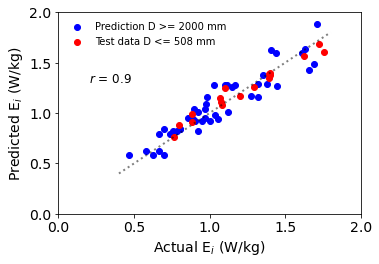

In [8]:
import matplotlib.pyplot as plt
# Plot actual and prediction

plt.rc('axes', labelsize=14) #font size of axes label
plt.rc('xtick', labelsize=14) #font size of tick label
plt.rc('ytick', labelsize=14) #font size of tick label

fig = plt.figure()
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.set_xlim(0,2)
ax.set_ylim(0,2)

x = np.arange(0.4,2,0.2)
m = 1
y = linear(m, x)

maxlim = 17
valid = []
invalid = []

for i in range(len(actual[maxlim:])):
    if (actual[maxlim+i]/predictions[maxlim+i] > 0.8 and actual[maxlim+i]/predictions[maxlim+i] < 1.2):
        valid.append(True)
    else:
        valid.append(False)
        invalid.append((features.iloc[i+maxlim:i+maxlim+1,:],"  ",str(actual[maxlim+i]/predictions[maxlim+i])))
# valid = (actual[maxlim:]/predictions[maxlim:] > 0.9 and actual[maxlim:]/predictions[maxlim:] < 1.0)


print(invalid)

newAct = []
newPred = []

count = 0
for i in range(len(valid)):
    if(valid[i]):
        newAct.append(actual[i+maxlim])
        newPred.append(predictions[i+maxlim])
        count += 1

print("TOTAL DATA",len(actual[maxlim:]))
print("NO OF INVALID",len(invalid))
print("NO OF VALID", count)       
        
# print(actual[maxlim:]/predictions[maxlim:] > 0.9)

# valid = actual[:]

ax.scatter(newAct, newPred,label="Prediction D >= 2000 mm",c='blue')
ax.scatter(actual[:maxlim], predictions[:maxlim],label="Test data D <= 508 mm",c='red', alpha=1.0)
# ax.scatter(actual[maxlim:], predictions[maxlim:],label="Prediction D >= 2000 mm",c='blue')


# print(actual)
# ax.scatter(actual[:], predictions[:],c='blue')
ax.plot(x,y,color='black', linestyle='dotted',linewidth=2.0, alpha=0.5)

ax.set_ylabel("Predicted E$_i$ (W/kg)")
ax.set_xlabel("Actual E$_i$ (W/kg)")
# ax.text(2150, 0.55, '$D_{50}$', fontsize=15)
# ax.text(0.2, 1.3, '$R^{2}$ = 0.9', fontsize=12)
ax.text(0.2, 1.3, '$r$ = 0.9', fontsize=12)
# ax.text(0.1, 1.1, 'accuracy = 80%', fontsize=12)
# ax.text(0.55, 1.7, 'Prediction D = 2000 mm', fontsize=12)
# ax.text(0.55, 1.6, 'Prediction D = 4000 mm', fontsize=12)
# ax.legend(loc="upper right")
lg = ax.legend(loc="upper left")
lg.get_frame().set_alpha(0)

plt.show()

import os
# save figure
path = "E:/mill/Paper/pics"
fout = os.path.join(path, "RT_RF_prediction_power_test.jpg")
fig.savefig(fout, dpi=300)


In [ ]:
# # Use datetime for creating date objects for plotting
# import datetime

# # Dates of training values
# months = features[:, feature_list.index('month')]
# days = features[:, feature_list.index('day')]
# years = features[:, feature_list.index('year')]


# # List and then convert to datetime object
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# # Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# # Dates of predictions
# months = test_features[:, feature_list.index('month')]
# days = test_features[:, feature_list.index('day')]
# years = test_features[:, feature_list.index('year')]

# # Column of     
# test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year,






# month, day in zip(years, months, days)]

# # Convert to datetime objects
# test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# # Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# # Plot the actual values
# plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# # Plot the predicted values
# plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()

# # Graph labels
# plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

In [ ]:
# # Make the data accessible for plotting
# true_data['temp_1'] = features[:, feature_list.index('temp_1')]
# true_data['average'] = features[:, feature_list.index('average')]
# true_data['friend'] = features[:, feature_list.index('friend')]
# # Plot all the data as lines
# plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
# plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
# plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
# plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
# # Formatting plot
# plt.legend(); plt.xticks(rotation = '60');
# # Lables and title
# plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');